# Algorithm to find the most frequent values in a stream

## Data generator

In [26]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

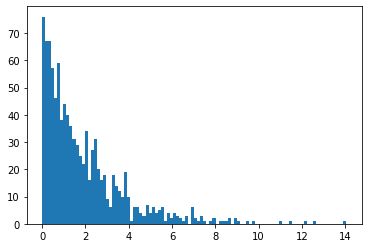

In [14]:
# Generate samples from an exponential distribution
beta = 2
n_samples = 1000

samples = [np.random.exponential(beta) for _ in range(n_samples)]

plt.hist(samples, bins=100)
plt.show()

In [18]:
counts = [math.ceil(s) for s in samples]

In [20]:
values = [f"id-{x}" for x in range(n_samples)]

In [27]:
# Replicate each value based on its count
replicated_values = []
for idx in range(n_samples):
    for c in range(counts[idx]):
        replicated_values.append(values[idx])

# Shuffle the values
random.shuffle(replicated_values)

## Ground truth

In [29]:
from collections import defaultdict

In [41]:
def gt_most_frequent(stream, n):
    
    # Count up how many times each value occurs
    gt_value_to_count = defaultdict(int)
    for s in replicated_values:
        gt_value_to_count[s] += 1
    
    # Convert the dict to a list of tuples
    tuple_value_to_count = list(gt_value_to_count.items())

    # Sort in descending order by the count
    sorted_tuples = sorted(tuple_value_to_count, key=lambda x: x[1], reverse=True)
    
    return sorted_tuples[:n]

In [43]:
gt_most_frequent(replicated_values, 5)

[('id-137', 15),
 ('id-212', 13),
 ('id-435', 13),
 ('id-777', 12),
 ('id-657', 11)]

## Naive approximation using a cache

In [55]:
# Cache holds the value from the stream and how many have been seen
cache = {}

n = 10
current_index = 0

for idx, s in enumerate(replicated_values):
    
    if s in cache:
        # Cache hit
        cache[s] += 1
    else:
        
        # Cache miss
        if len(cache) < n:
            cache[s] = 1
        else:
            # Need to evict an item from the cache
            evicted_id = sorted(list(cache.items()), key=lambda x: x[1], reverse=False)[0][0]
            del cache[evicted_id]
            
            cache[s] = 1
            
cache

{'id-723': 7,
 'id-558': 4,
 'id-295': 5,
 'id-809': 6,
 'id-655': 4,
 'id-508': 4,
 'id-624': 6,
 'id-108': 4,
 'id-903': 2,
 'id-226': 1}

## Approximation

In [ ]:
class CacheNode:
    def __init__(self, data):
        self.data = data
        self.next = None
        seld.prev = None
    
    def __repr__(self):
        return str(self.data)

    def __str__(self):
        return self.__repr__()
    
class CacheDoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    
    